# Handwritten Digit Recognition with TensorFlow

In this notebook, we'll build and train a Convolutional Neural Network (CNN) to recognize handwritten digits using the MNIST dataset. We'll go through:

1. Data Loading and Preprocessing
2. Building a CNN Model
3. Training the Model
4. Visualizing Training Progress
5. Testing with Custom Images
6. Understanding the Model's Decision Process

Let's start by importing the required libraries:


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import seaborn as sns

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Enable GPU memory growth to avoid memory allocation issues
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


## 1. Data Loading and Preprocessing

The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9):
- 60,000 training images
- 10,000 test images
- Each image is 28x28 pixels

Let's load and preprocess the data:


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 86s 7us/step


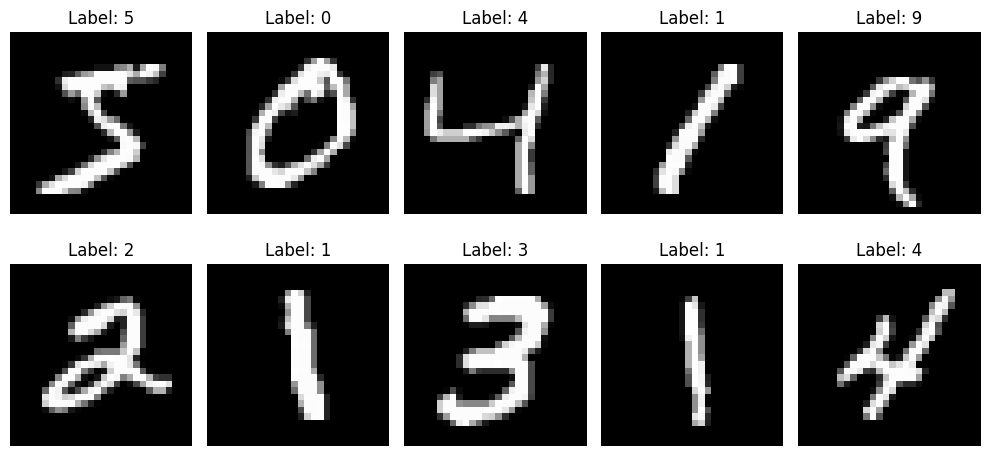

Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


In [4]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape images to include channel dimension (required for CNN)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Display some example images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


## 2. Building the CNN Model

We'll create a Convolutional Neural Network with the following architecture:
1. Convolutional layers to extract features
2. Max pooling layers to reduce dimensionality
3. Dropout layers to prevent overfitting
4. Dense layers for classification

The architecture is designed to:
- Learn hierarchical features from simple to complex
- Be robust against variations in digit position and style
- Prevent overfitting with regularization


In [5]:
# Build the CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


e:\Programming\AI\AI-course\week3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,042 (515.79 KB)

 Trainable params: 131,466 (513.54 KB)

 Non-trainable params: 576 (2.25 KB)

## 3. Training the Model

Now we'll train our model with:
- Training data and validation split
- Early stopping to prevent overfitting
- Model checkpointing to save the best model
- Learning rate reduction on plateau

We'll also visualize the training progress to understand how the model learns over time.


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.7599 - loss: 0.8014 - val_accuracy: 0.3929 - val_loss: 2.1681 - learning_rate: 0.0010
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9625 - loss: 0.1262 - val_accuracy: 0.9804 - val_loss: 0.0663 - learning_rate: 0.0010
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9713 - loss: 0.0908 - val_accuracy: 0.9865 - val_loss: 0.0426 - learning_rate: 0.0010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9771 - loss: 0.0719 - val_accuracy: 0.9883 - val_loss: 0.0384 - learning_rate: 0.0010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9821 - loss: 0.0592 - val_accuracy: 0.9891 - val_loss: 0.0361 - learning_rate: 0.0010
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9832 - loss: 0.0535 - val_accuracy: 0.9902 - val_loss: 0.0345 - learning_rate: 0.0010
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9844 - l

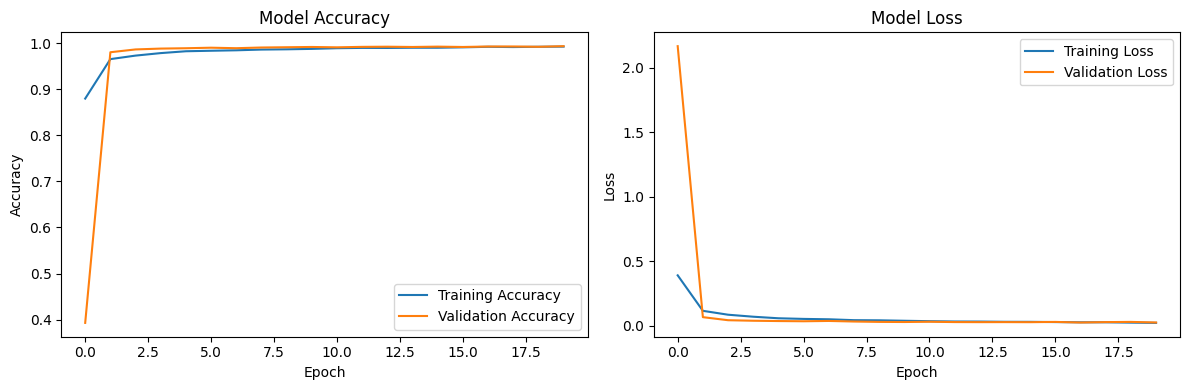

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9906 - loss: 0.0319

Test accuracy: 0.9931
Test loss: 0.0243


In [6]:
# Set up callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

# Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


## 4. Understanding Model Predictions

Let's examine how our model makes predictions and visualize its decision-making process:
1. Make predictions on test images
2. Show confusion matrix to understand error patterns
3. Visualize feature maps to see what the model "sees"
4. Display examples of correct and incorrect predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


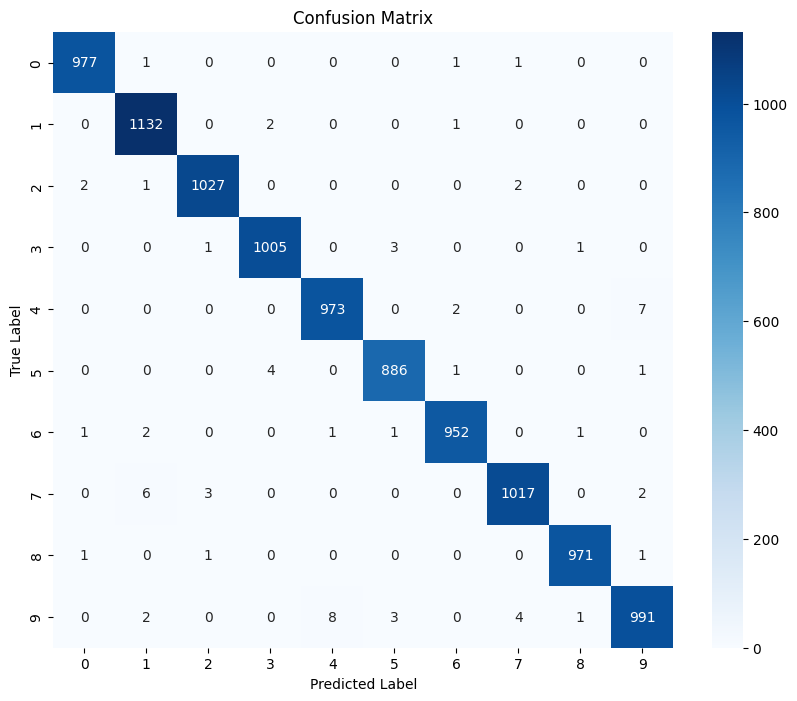

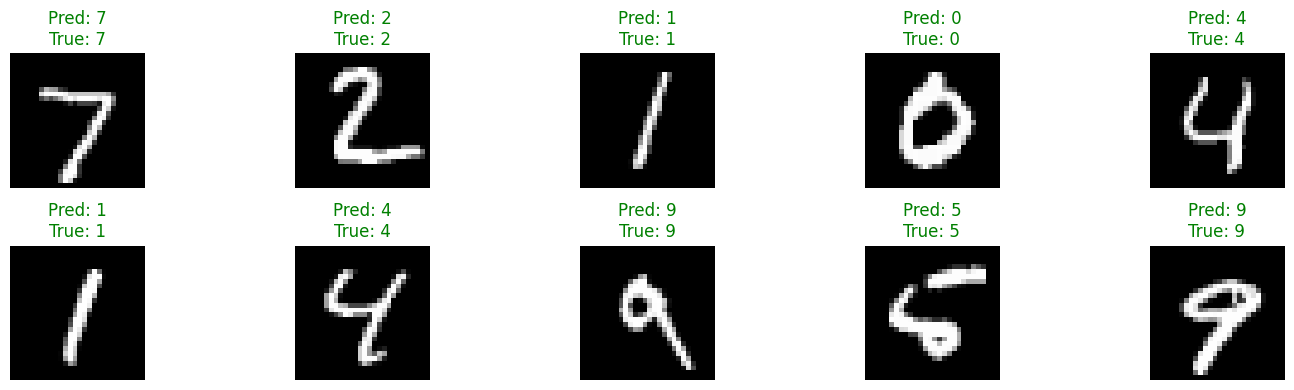

Total test images: 10000
Correct predictions: 9931
Incorrect predictions: 69
Accuracy: 0.9931

Some misclassified examples:


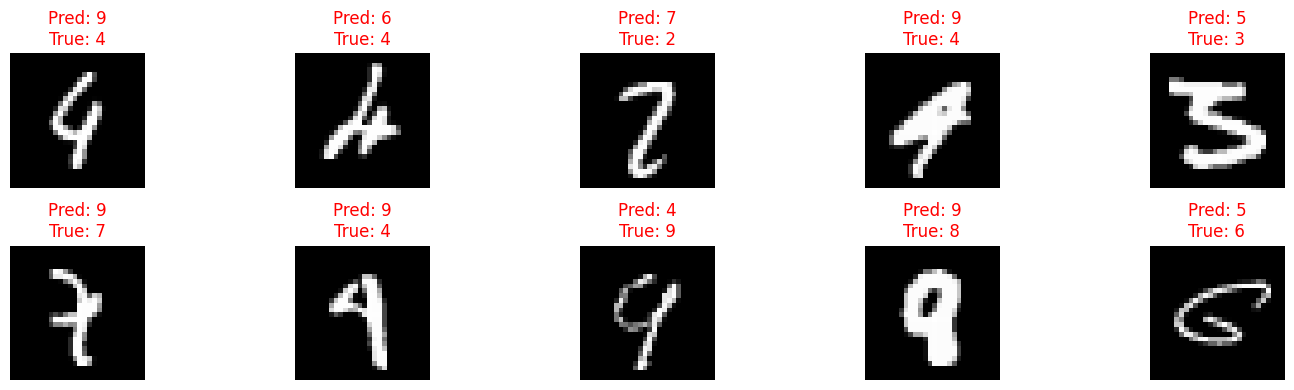

In [7]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = tf.math.confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Function to display prediction results
def display_prediction_results(images, true_labels, predictions, num_images=10):
    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        predicted = np.argmax(predictions[i])
        color = 'green' if predicted == true_labels[i] else 'red'
        plt.title(f'Pred: {predicted}\nTrue: {true_labels[i]}', color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display some prediction results
display_prediction_results(test_images[:10], test_labels[:10], predictions[:10])

# Calculate and display metrics
correct_indices = np.where(predicted_labels == test_labels)[0]
incorrect_indices = np.where(predicted_labels != test_labels)[0]

print(f"Total test images: {len(test_labels)}")
print(f"Correct predictions: {len(correct_indices)}")
print(f"Incorrect predictions: {len(incorrect_indices)}")
print(f"Accuracy: {len(correct_indices)/len(test_labels):.4f}")

# Display some misclassified examples
if len(incorrect_indices) > 0:
    print("\nSome misclassified examples:")
    indices = incorrect_indices[:10]
    display_prediction_results(
        test_images[indices], 
        test_labels[indices], 
        predictions[indices]
    )


## 5. Visualizing Feature Maps

Let's look at what features our CNN is detecting. We'll create a model that outputs the activation maps from our first convolutional layer to see what patterns the network learns to detect.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


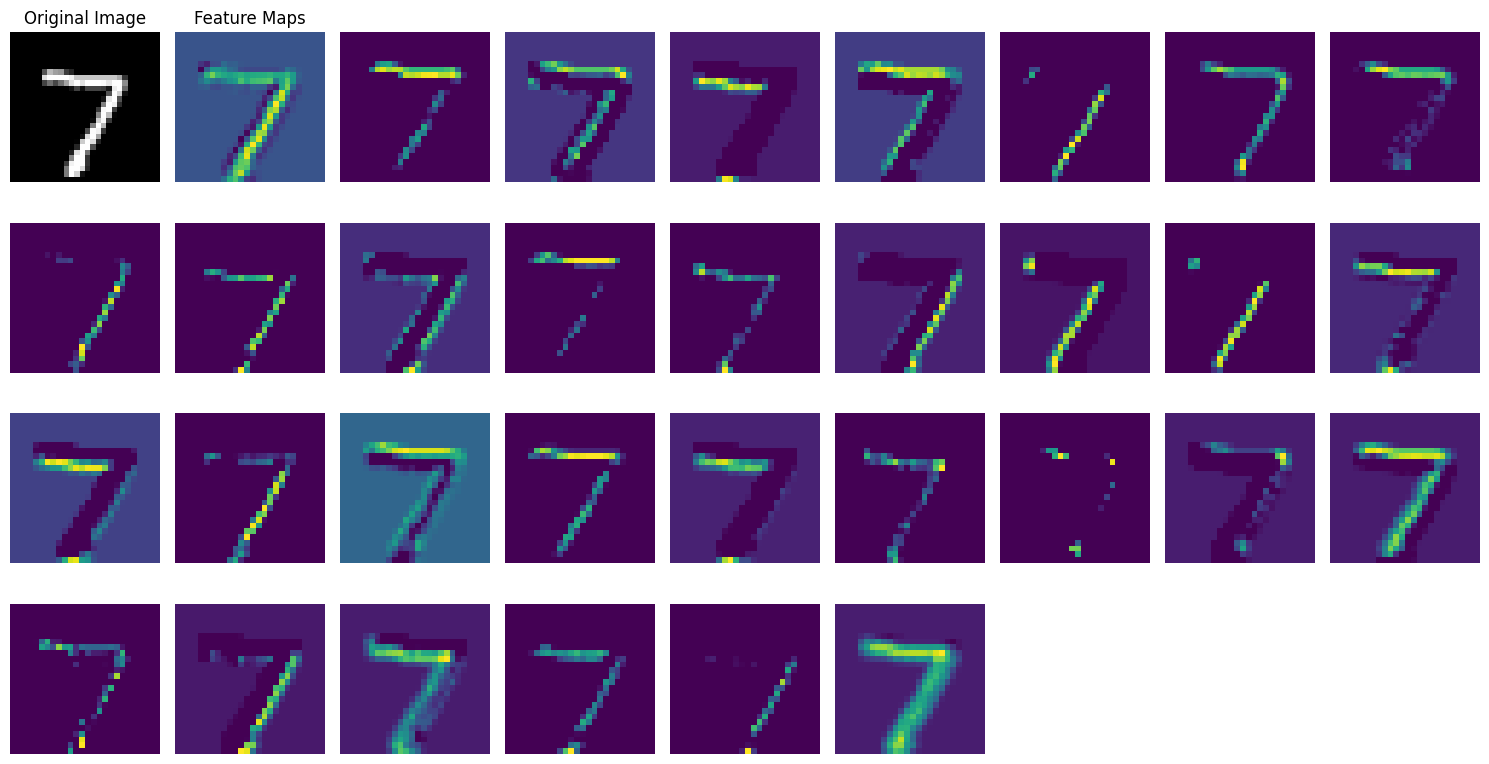

This is a sample image of digit: 7


In [8]:
# Create a model that outputs feature maps from the first conv layer
feature_model = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.layers[0].output
)

# Get feature maps for a sample image
sample_image = test_images[0:1]  # Add batch dimension
feature_maps = feature_model.predict(sample_image)

# Plot the original image and its feature maps
plt.figure(figsize=(15, 8))

# Original image
plt.subplot(4, 9, 1)
plt.imshow(sample_image[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Feature maps
for i in range(32):  # 32 filters in first conv layer
    plt.subplot(4, 9, i + 2)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
    if i == 0:
        plt.title('Feature Maps')

plt.tight_layout()
plt.show()

# Print the digit class
print(f"This is a sample image of digit: {test_labels[0]}")


## 6. Testing with Custom Input

Now let's create a function that can process and recognize hand-drawn digits. This function will:
1. Accept a 28x28 grayscale image
2. Preprocess it like our training data
3. Make a prediction
4. Show confidence scores for each digit

This is useful for testing the model with new, unseen digits.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


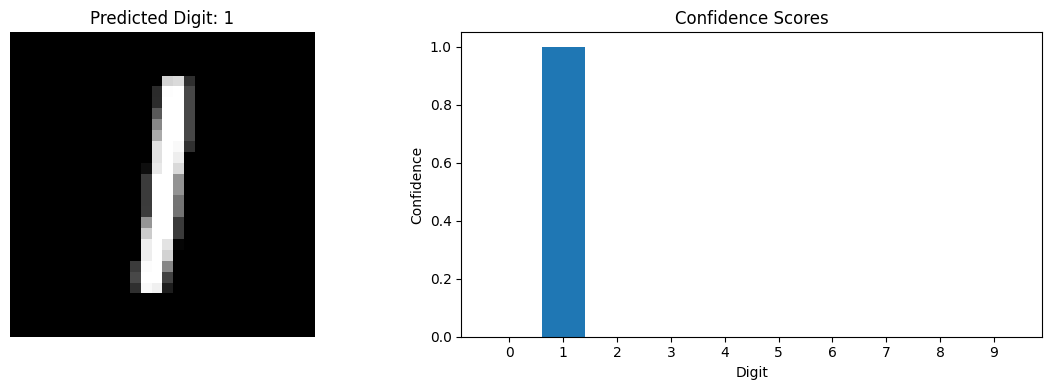

True digit: 1

Confidence scores for each digit:
Digit 0: 0.0000
Digit 1: 0.9999
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0001
Digit 8: 0.0000
Digit 9: 0.0000


In [9]:
def predict_digit(image):
    """
    Predict digit from a preprocessed 28x28 grayscale image.
    """
    # Ensure image is 28x28
    if image.shape != (28, 28):
        raise ValueError("Image must be 28x28 pixels")
    
    # Preprocess image
    image = image.astype('float32') / 255.0
    image = image.reshape(1, 28, 28, 1)
    
    # Get prediction
    predictions = model.predict(image)
    predicted_digit = np.argmax(predictions[0])
    
    # Plot image and confidence scores
    plt.figure(figsize=(12, 4))
    
    # Plot input image
    plt.subplot(1, 2, 1)
    plt.imshow(image[0].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.axis('off')
    
    # Plot confidence scores
    plt.subplot(1, 2, 2)
    confidence_scores = predictions[0]
    plt.bar(range(10), confidence_scores)
    plt.title('Confidence Scores')
    plt.xlabel('Digit')
    plt.ylabel('Confidence')
    plt.xticks(range(10))
    
    plt.tight_layout()
    plt.show()
    
    return predicted_digit, confidence_scores

# Test the function with a sample from test set
sample_idx = np.random.randint(0, len(test_images))
sample_image = test_images[sample_idx].reshape(28, 28)
predicted_digit, confidence_scores = predict_digit(sample_image)

print(f"True digit: {test_labels[sample_idx]}")
print("\nConfidence scores for each digit:")
for digit, confidence in enumerate(confidence_scores):
    print(f"Digit {digit}: {confidence:.4f}")
